In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '../web/dataset/'
vali = pd.read_csv(path+'validation.csv')

In [2]:
def const(bid):
    price = bid
    return price

def rand(upper):
    price = int(random.random() * upper)
    return price

def mcpc(ecpc, pctr):
    price = int(ecpc * pctr)
    return price

def lin(pctr, basectr, basebid):
#     price = int(pctr*pctr/ basectr *basebid)
    price = int(pctr/basectr*basebid)
    return price

def win(payprice, price):
    result = (price>payprice)
    return result

In [3]:
from random import randrange

## test on  validation set

In [11]:
final_final_result = []
for i in [64,32,16,8,4,2,1]:
    final_result = []
    for n in np.arange(2,303,25):
        random_bidwin = []
        bidwin = []
        budget = 6500*1000/i
        cost = 0

        for index in range(len(vali)):

            bidid = vali.bidid[index]
            slotprice = vali.slotprice[index]
            bidprice = vali.bidprice[index]
            payprice = vali.payprice[index]
            click = vali.click[index]

            price = randrange(n)
            result = win(payprice, price)

            if result and budget-payprice>0:
                detail = []
                budget = budget-payprice
                #index, adid, click, pclick
                detail = [index,bidid,click]
                random_bidwin.append(detail)
                cost = cost + payprice
            if budget<1:
                break

            slotprice = 0
            bidprice = 0

        c_sum = 0
        for m in range(len(random_bidwin)):
            c_sum = random_bidwin[m][2]+c_sum
        if len(random_bidwin) ==0:
            ctr=0
        else:
            ctr=c_sum/len(random_bidwin)
            cpm = cost/len(random_bidwin)* 1000
            cpc = cost/c_sum
        if ctr == 0:
            cpc = 0
        detail2 = [i,n,len(random_bidwin),c_sum,ctr,cpm,cpc,cost]
        final_result.append(detail2)
        print('budget: 1/',i,'upper bound: ',n,'num of win: ',len(random_bidwin),'num of click: ',c_sum,'ctr: ',ctr,'cpm: ',cpm,'cpc: ',cpc,'cost',cost)
    final_final_result.append(final_result)

budget: 1/ 64 upper bound:  2 num of win:  26 num of click:  0 ctr:  0.0 cpm:  0.0 cpc:  0 cost 0
budget: 1/ 64 upper bound:  27 num of win:  8772 num of click:  0 ctr:  0.0 cpm:  11577.9753762 cpc:  0 cost 101562
budget: 1/ 64 upper bound:  52 num of win:  5467 num of click:  3 ctr:  0.00054874702762 cpm:  18577.2818731 cpc:  33854.0 cost 101562
budget: 1/ 64 upper bound:  77 num of win:  3678 num of click:  3 ctr:  0.000815660685155 cpm:  27613.3768352 cpc:  33854.0 cost 101562
budget: 1/ 64 upper bound:  102 num of win:  2823 num of click:  4 ctr:  0.00141693234148 cpm:  35976.6206164 cpc:  25390.5 cost 101562
budget: 1/ 64 upper bound:  127 num of win:  2458 num of click:  1 ctr:  0.000406834825061 cpm:  41318.9585028 cpc:  101562.0 cost 101562
budget: 1/ 64 upper bound:  152 num of win:  2215 num of click:  2 ctr:  0.000902934537246 cpm:  45851.9187359 cpc:  50781.0 cost 101562
budget: 1/ 64 upper bound:  177 num of win:  2098 num of click:  2 ctr:  0.00095328884652 cpm:  48408.96

budget: 1/ 4 upper bound:  227 num of win:  29630 num of click:  26 ctr:  0.000877489031387 cpm:  54843.0307121 cpc:  62499.9615385 cost 1624999
budget: 1/ 4 upper bound:  252 num of win:  28203 num of click:  26 ctr:  0.000921887742439 cpm:  57617.9484452 cpc:  62499.9615385 cost 1624999
budget: 1/ 4 upper bound:  277 num of win:  26957 num of click:  28 ctr:  0.00103869124903 cpm:  60281.1514634 cpc:  58035.6785714 cost 1624999
budget: 1/ 4 upper bound:  302 num of win:  26091 num of click:  25 ctr:  0.000958184814687 cpm:  62281.9746273 cpc:  64999.96 cost 1624999
budget: 1/ 2 upper bound:  2 num of win:  32 num of click:  0 ctr:  0.0 cpm:  0.0 cpc:  0 cost 0
budget: 1/ 2 upper bound:  27 num of win:  22695 num of click:  8 ctr:  0.000352500550782 cpm:  11495.8360872 cpc:  32612.25 cost 260898
budget: 1/ 2 upper bound:  52 num of win:  50976 num of click:  20 ctr:  0.000392341494036 cpm:  18629.7080979 cpc:  47483.4 cost 949668
budget: 1/ 2 upper bound:  77 num of win:  81179 num of

In [12]:
incase=final_final_result[0]

In [13]:
for i in range(1,7):
    incase.extend(final_final_result[i])

In [18]:
new=pd.DataFrame(incase)
new.columns = ['budget','Upper_bound', 'impression','clicks','ctr','cpm','cpc','cost']

In [21]:
int_to_str_budget = {1:'1',2:'1/2',4:'1/4',8:'1/8',16:'1/16',32:'1/32',64:'1/64'}
new['budget'] = new['budget'].map(int_to_str_budget)

In [22]:
new.iloc[np.where(new.clicks == new.clicks.max())[0]]

,budget,Upper_bound,impression,clicks,ctr,cpm,cpc,cost
86,1,202,124201,86,0.000692,52334.514215,75581.383721,6499999


In [23]:
new.iloc[np.where(new.ctr == new.ctr.max())[0]]

,budget,Upper_bound,impression,clicks,ctr,cpm,cpc,cost
4,1/64,102,2823,4,0.001417,35976.620616,25390.5,101562


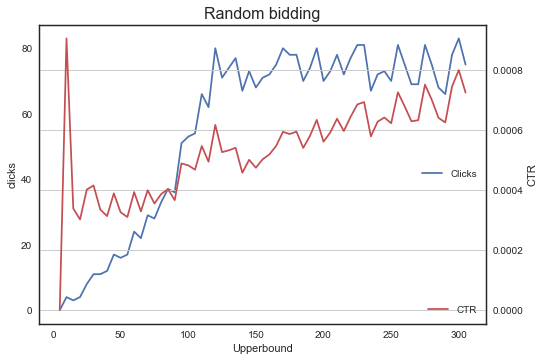

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Upperbound')
ax1.plot(result.Upper_bound,result.Clicks,'b',label='Clicks')
ax1.set_ylabel('clicks')
ax1.set_title("Random bidding",fontsize=16)
plt.legend(loc='right')
ax2 = ax1.twinx()
ax2.plot(result.Upper_bound, result.CTR,'r',label='CTR')
ax2.set_ylabel('CTR')
plt.legend(loc='lower right')
# plt.legend([ax1, ax2], ["CTR", "Clicks"], loc='upper right')
plt.grid(True)
plt.show()


# fig.savefig('random.PNG', dpi=1000)

result.to_csv("random_bidding.csv", index = False)

In [5]:
result = pd.read_csv('random_bidding.csv')

In [6]:
result

,Upper_bound,Impression,Clicks,CTR,CPM,CPC
0,5,409,0,0.000000,1393.643032,0.000000
1,10,4423,4,0.000904,4665.385485,5158.750000
2,15,8859,3,0.000339,6158.821537,18187.000000
3,20,13243,4,0.000302,7774.371366,25739.000000
4,25,19932,8,0.000401,10595.675296,26399.125000
5,30,26500,11,0.000415,12526.377358,30177.181818
6,35,32864,11,0.000335,14120.070594,42185.636364
7,40,38311,12,0.000313,15480.697450,49423.416667
8,45,43712,17,0.000389,16808.588031,43219.823529
9,50,49102,16,0.000326,18028.084396,55325.937500
